# PROJECT 4.2 HEART DISEASE
## `DATA EXPLORATION AND ANALYSIS PART 2`

This module is to apply DecisionTreeClassifier to specify the data with new feature engineering. In this module, we shall find the ratio between the features to find out the more correlation between them

## 1. LOAD ORIGINAL DATA

In [1]:
import errno

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [3]:
def data_loader(path):
    """
    minor function to collect train, validation and test data with error check
    :param path:
    :return:
    """
    try:
        train_data = pd.read_csv(path + "train.csv")
        test_data = pd.read_csv(path + "test.csv")
        val_data = pd.read_csv(path + "val.csv")
        print("✅ Load data successfully")
    except FileNotFoundError:
        print("❌ Data not found, please run data_loader first")

    return train_data, test_data, val_data

In [4]:
train_data, test_data, val_data = data_loader("../dataset/")
train_data.head(10)

✅ Load data successfully


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,0,4,150,258,0,2,157,0,2.6,2,2.0,7.0,3
1,39,1,3,140,321,0,2,182,0,0.0,1,0.0,3.0,0
2,54,0,2,132,288,1,2,159,1,0.0,1,1.0,3.0,0
3,56,1,2,130,221,0,2,163,0,0.0,1,0.0,7.0,0
4,67,1,4,125,254,1,0,163,0,0.2,2,2.0,7.0,3
5,55,1,2,130,262,0,0,155,0,0.0,1,0.0,3.0,0
6,47,1,3,130,253,0,0,179,0,0.0,1,0.0,3.0,0
7,60,1,4,125,258,0,2,141,1,2.8,2,1.0,7.0,1
8,58,0,4,100,248,0,2,122,0,1.0,2,0.0,3.0,0
9,59,1,4,170,326,0,2,140,1,3.4,3,0.0,7.0,2


In [5]:
numeric_cols = ["age","trestbps","chol","thalach","oldpeak", "chol_per_age", "bps_per_age", "hr_ratio"]
categorical_cols = ["sex","cp","fbs","restecg","exang","slope","ca","thal", "age_bin"]

## 2. PERFORM FEATURE ENGINEERING

In [6]:
X_train = train_data.drop("target", axis=1)
y_train = train_data["target"]
X_test = test_data.drop("target", axis=1)
y_test = test_data["target"]
X_val = val_data.drop("target", axis=1)
y_val = val_data["target"]

feature_cols = X_train.columns

The preprocessing in this module is using SimpleImputer & OneHotEncorder

In [7]:
from src.data.data_engineering import AddNewFeatures

# Create a pipeline to transform the train, val and test data through 02 transformer: AddNewFeatures & ColumnTransformer
# ColumnTransformer = SimpleImputer, StandardScaler & OneHotEncoder

numerical_ppl = Pipeline(
    [("imputer", SimpleImputer(strategy="median")),
      ("sc", StandardScaler())]
)
categorical_ppl = Pipeline(
    [("imputer", SimpleImputer(strategy="most_frequent")),
     ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]
)

preprocessing = ColumnTransformer([
    ("numerical", numerical_ppl, numeric_cols),
    ("categorical", categorical_ppl, categorical_cols)],
     verbose_feature_names_out = False).set_output(transform="pandas")

fe_pipeline = Pipeline([
    ("add", AddNewFeatures()),
    ("preprocessing", preprocessing),
])

X_train_fe = fe_pipeline.fit_transform(X_train, y_train) # In this situation, y_train is not used
X_val_fe = fe_pipeline.transform(X_val)
X_test_fe = fe_pipeline.transform(X_test)
X_train_fe.head(10)

,age,trestbps,chol,thalach,oldpeak,chol_per_age,bps_per_age,hr_ratio,sex_0.0,sex_1.0,...,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,age_bin_0.0,age_bin_1.0,age_bin_2.0,age_bin_3.0,age_bin_4.0
0,0.594945,1.020911,0.169014,0.307680,1.320132,-0.313670,-0.420254,-0.122544,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.711319,0.463338,1.327117,1.411752,-0.900796,3.088780,0.810669,0.138468,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.063987,0.017280,0.720492,0.396006,-0.900796,0.580777,0.572075,0.241604,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.155657,-0.094234,-0.511143,0.572657,-0.900796,-0.619719,-0.463229,-0.745648,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.363700,-0.373021,0.095483,0.572657,-0.729955,-0.754219,0.250154,-0.306841,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.045835,-0.094234,0.242544,0.219354,-0.900796,0.087651,0.214452,-0.020652,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.832742,-0.094234,0.077101,1.279263,-0.900796,0.623750,0.065692,-0.620848,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.594945,-0.373021,0.169014,-0.398926,1.490973,-0.313670,0.318914,0.281629,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.375301,-1.766952,-0.014812,-1.238020,-0.046593,-0.334564,1.212791,0.721619,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.485123,2.136056,1.419030,-0.443089,2.003495,0.747049,0.004439,1.362713,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### THE STEPS BELOW ARE JUST FOR FINDING THE MUTUAL INFORMATION

In [8]:
print(fe_pipeline.named_steps["preprocessing"].named_transformers_["categorical"].named_steps["oh"])
ohe = fe_pipeline.named_steps["preprocessing"].named_transformers_["categorical"].named_steps["oh"]
print(ohe.get_feature_names_out(categorical_cols))
print("---------------------------------------------------")
print(preprocessing.named_transformers_)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)
['sex_0.0' 'sex_1.0' 'cp_1.0' 'cp_2.0' 'cp_3.0' 'cp_4.0' 'fbs_0.0'
 'fbs_1.0' 'restecg_0.0' 'restecg_1.0' 'restecg_2.0' 'exang_0.0'
 'exang_1.0' 'slope_1.0' 'slope_2.0' 'slope_3.0' 'ca_0.0' 'ca_1.0'
 'ca_2.0' 'ca_3.0' 'thal_3.0' 'thal_6.0' 'thal_7.0' 'age_bin_0.0'
 'age_bin_1.0' 'age_bin_2.0' 'age_bin_3.0' 'age_bin_4.0']
---------------------------------------------------
{'numerical': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('sc', StandardScaler())]), 'categorical': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('oh',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])}


In [9]:
# This function to export the feature names after processing the pipelines
# Feature names to be exported are categorical names
# ohe is the discrete (rời rạc) features to setup in mutual classif function
ohe = fe_pipeline.named_steps["preprocessing"].named_transformers_["categorical"].named_steps["oh"]
cat_names = list(ohe.get_feature_names_out(categorical_cols))
print(cat_names)

['sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'age_bin_0.0', 'age_bin_1.0', 'age_bin_2.0', 'age_bin_3.0', 'age_bin_4.0']


In [10]:
# nz_cols xác định số lượng non-zero cols trong features, trong trường hợp database lần này không có nz cols
nz_cols = X_train_fe.columns[X_train_fe.nunique(dropna=False) > 1]
print(X_train_fe.columns, "\n",
      len(X_train_fe.columns))
print("========================")
print(nz_cols, "\n",
      len(nz_cols))

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_per_age',
       'bps_per_age', 'hr_ratio', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'age_bin_0.0', 'age_bin_1.0', 'age_bin_2.0',
       'age_bin_3.0', 'age_bin_4.0'],
      dtype='object') 
 36
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_per_age',
       'bps_per_age', 'hr_ratio', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'age_bin_0.0', 'age_bin_1.0', 'age_bin_2.0',
       'age_bin_3.0', 'age_bin_4.0'],

#### Guidelines about mutual_info_classif

mi_scores = mutual_info_classif(

    X,                    # DataFrame hoặc array features

    y,                    # Target (phân loại)

    discrete_features='auto',  # Chỉ định feature nào là rời rạc

    n_neighbors=3,        # Số neighbors cho ước lượng (mặc định=3)

    random_state=42       # Để kết quả ổn định
)

In [11]:

discrete_features = np.array([c in cat_names for c in X_train_fe.columns], dtype="bool")

In [12]:
mi = mutual_info_classif(
    X_train_fe.values,
    y_train.values,
    discrete_features=discrete_features,
    random_state=42
)
mi_series = pd.Series(
    mi, index=X_train_fe.columns
).sort_values(ascending=False)

print(mi)
print("----------")
mi_series.head(10)

[0.         0.         0.08227398 0.10242403 0.09231814 0.
 0.         0.07408869 0.05047076 0.05047076 0.01309531 0.04544598
 0.03688892 0.13183166 0.0124923  0.0124923  0.021472   0.01107542
 0.01836742 0.10051104 0.10051104 0.1023772  0.07762578 0.00958782
 0.13359028 0.03547993 0.04329893 0.06142177 0.15766677 0.01986047
 0.13188707 0.01042711 0.02274073 0.01125677 0.03841968 0.01604152]
----------


thal_3.0     0.157667
ca_0.0       0.133590
thal_7.0     0.131887
cp_4.0       0.131832
thalach      0.102424
slope_1.0    0.102377
exang_0.0    0.100511
exang_1.0    0.100511
oldpeak      0.092318
chol         0.082274
dtype: float64

<BarContainer object of 20 artists>

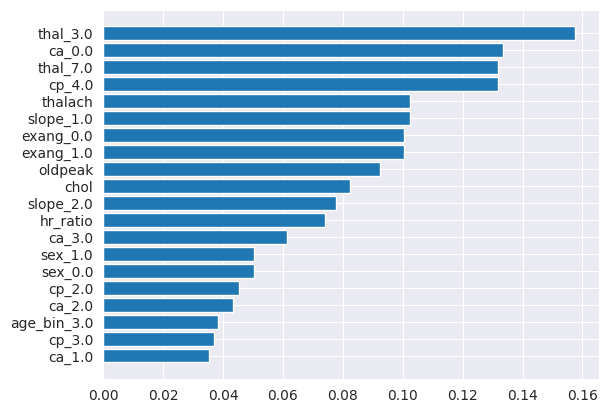

In [13]:
N = min(20, len(mi_series))
topN = mi_series.head(N).iloc[::-1]
# plt.figure(figsize=(10, max(6, N)))
plt.barh(topN.index, topN.values)

## 3. FE DATA AND DECISION TREE

In [14]:
dt_classifier = DecisionTreeClassifier(random_state=42)
important_fe_features = dt_classifier.fit(X_train_fe, y_train).feature_importances_
important_fe_data = pd.Series(important_fe_features, index=X_train_fe.columns)
important_fe_features_sorted = important_fe_data.sort_values(ascending=False)

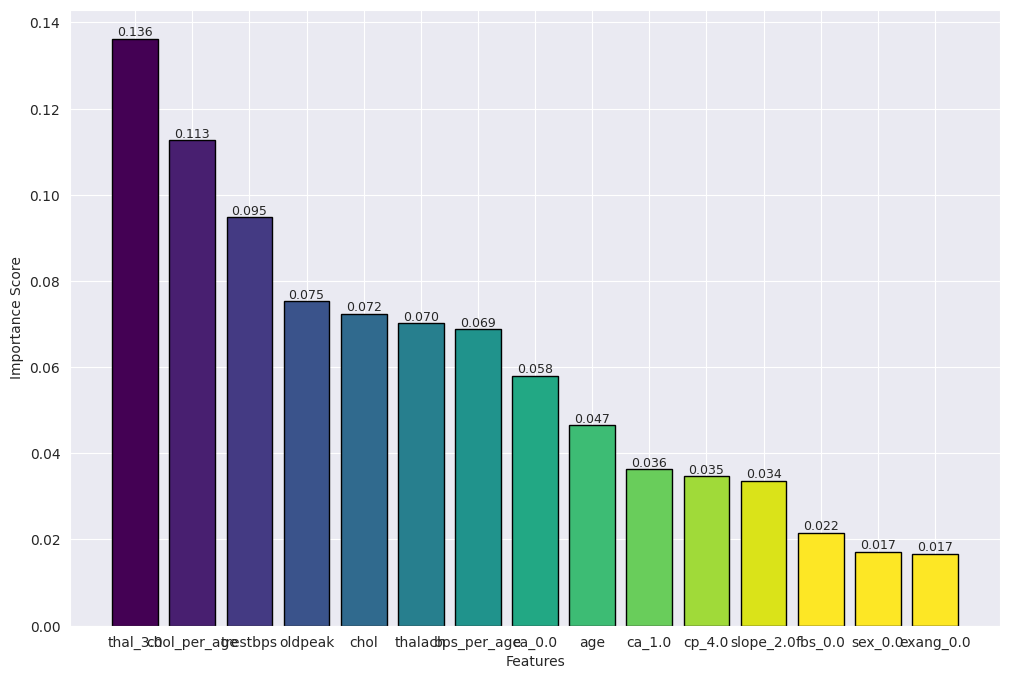

In [16]:
from src.data.data_visualization import bar_charts
bar_charts(important_fe_features_sorted, k=15)